In [5]:
#Load the following libraries
library(tidyverse)
library(RColorBrewer)

In [6]:
#Run cell to load, wrangle, and summarize datasets


#Loading in the datasets
sessions_data <- read_csv("sessions.csv")
players_data <- read_csv("players.csv")


#Wrangling Players dataset to improve tidiness
players_tidy <- players_data |>
    pivot_wider(names_from = experience, values_from = experience)

players_tidy1 <- players_tidy |>
    filter(Beginner == "Beginner") |>
    select(- Amateur, - Regular, - Veteran, - Pro)
colnames(players_tidy1) <- c("subscribed", "hashed_email", "played_hours", "name", "gender", "age", "1")
players_tidy1 <- players_tidy1 |>
    pivot_longer(cols = "1", names_to = "experience_level") |>
    select(- value)

players_tidy2 <- players_tidy |>
    filter(Amateur == "Amateur") |>
    select(- Beginner, - Regular, - Veteran, - Pro)
colnames(players_tidy2) <- c("subscribed", "hashed_email", "played_hours", "name", "gender", "age", "2")
players_tidy2 <- players_tidy2 |>
    pivot_longer(cols = "2", names_to = "experience_level") |>
    select(- value)

players_tidy3 <- players_tidy |>
    filter(Regular == "Regular") |>
    select(- Amateur, - Beginner, - Veteran, - Pro)
colnames(players_tidy3) <- c("subscribed", "hashed_email", "played_hours", "name", "gender", "age", "3")
players_tidy3 <- players_tidy3 |>
    pivot_longer(cols = "3", names_to = "experience_level") |>
    select(- value)

players_tidy4 <- players_tidy |>
    filter(Veteran == "Veteran") |>
    select(- Amateur, - Regular, - Beginner, - Pro)
colnames(players_tidy4) <- c("subscribed", "hashed_email", "played_hours", "name", "gender", "age", "4")
players_tidy4 <- players_tidy4 |>
    pivot_longer(cols = "4", names_to = "experience_level") |>
    select(- value)

players_tidy5 <- players_tidy |>
    filter(Pro == "Pro") |>
    select(- Amateur, - Regular, - Veteran, - Beginner)
colnames(players_tidy5) <- c("subscribed", "hashed_email", "played_hours", "name", "gender", "age", "5")
players_tidy5 <- players_tidy5 |>
    pivot_longer(cols = "5", names_to = "experience_level") |>
    select(- value)

players_tidy12 <- full_join(players_tidy1, players_tidy2)
players_tidy123 <- full_join(players_tidy12, players_tidy3)
players_tidy1234 <- full_join(players_tidy123, players_tidy4)
players_tidy_final <- full_join(players_tidy1234, players_tidy5)

players_tidy_final <- players_tidy_final |>
    mutate(experience_level = as.numeric(experience_level))


#Summarizing mean playtime for numeric variables in tidy Players dataset
players_mean_time <- players_tidy_final |>
    group_by(experience_level) |>
    summarize(mean(played_hours, na.rm = TRUE)) |>
    round(2)
colnames(players_mean_time) <- c("experience_level", "average_played_hours")


#Summarizing mean age for numeric variables in tidy Players dataset
players_mean_age <- players_tidy_final |>
    group_by(experience_level) |>
    summarize(mean(age, na.rm = TRUE)) |>
    round(2)
colnames(players_mean_age) <- c("experience_level", "average_age")


#Combining mean playtime and age into one table
players_mean <- inner_join(players_mean_time, players_mean_age)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(subscribed, hashed_email, played_hours, name,
gender, age, experience_level)`
Joining with `by = join_by(subscribed, hashed_email, played_hours, name,
gender, age, experience_level)`
Joining with `by = join_by(subscribed, hashed_email, played_h

### **Description of Dataset**

#### **1. Players Dataset**
- 196 rows (observations)
- 7 columns (variables)
    - **experience**
        - Describes the experience level of the player in Minecraft
        - Divided into 5 categories: Beginner, Amateur, Regular, Veteran, Pro
        - Character type variable
    - **subscribe**
        - Denotes if the player is subscribed to a game-related newsletter
        - Logical type variable
    - **hashedEmail**
        - Denotes the hashed emails of players
        - Character type variable
    - **played_hours**
        - Denotes the total play times of individual players on the experimental Minecraft server
        - Double type variable
    - **name**
        - Denotes the names of players
        - Character type variable
    - **gender**
        - Denotes the genders of players
        - Character type variable
    - **Age**
        - Denotes the ages of players
        - Double type variable

**Steps taken to make Players dataset tidy**
- Applied lower cases and underscores to "Age" and "hashedEmail" variable to follow standardized variable format
- Changed "experience" variable into a double type variable, with observations of experience levels changed into numbers 1 - 5, with 1 being least experienced (beginner) and 5 being most (pro).


#### **2. Sessions Dataset**
- 1535 rows (observations)
- 5 columns (variables)
    - **hashedEmail**
        - Denotes the hashed emails of players
        - Character type variable
    - **start_time**
        - Indicates the starting time of an individual play session on the server by a player
        - Character type variable (Date)
    - **end_time**
        - Indicates the ending time of an individual play session
        - Character type variable (Date)
    - **original_start_time**
        - Indicates the starting time of an individual play session in UNIX time (milliseconds)
        - Double type variable (Time)
    - **original_end_time**
        - Indicates the ending time of an individual play session in UNIX time
        - Double type variable (Time)

Sessions dataset was not wrangled as it is not used.


### **Summary Statistics**

The table below illustrates the average played hours and age of players in each experience level. 

| Experience level | Mean played hours | Mean age |
| :--------------: | :---------------: | :------: |
| 1 | 1.25 | 21.66 |
| 2 | 6.02 | 21.37 |
| 3 | 18.21 | 22.03 |
| 4 | 0.65 | 20.96 |
| 5 | 2.60 | 16.92 |


### **Exploratory Questions**

The broad question I aim to address is, "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?". This will be addressed through a focus on players' age, which will be used to answer my specific question of, "Can the ages of minecraft players be used to predict their subscription rates to gaming newsletters in the players dataset?". This will be achieved through grouping players into subsections of each experience level, then creating a prediction model using age as a predictor to predict subscription to newsletters.


### **Visualizations**

The following histogram helps understand the correlation between age and newsletter subscriptions. No strong correlation between the two variables is visible, which may suggest age is not a good variable to predict subscription, contrary to my question. 

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


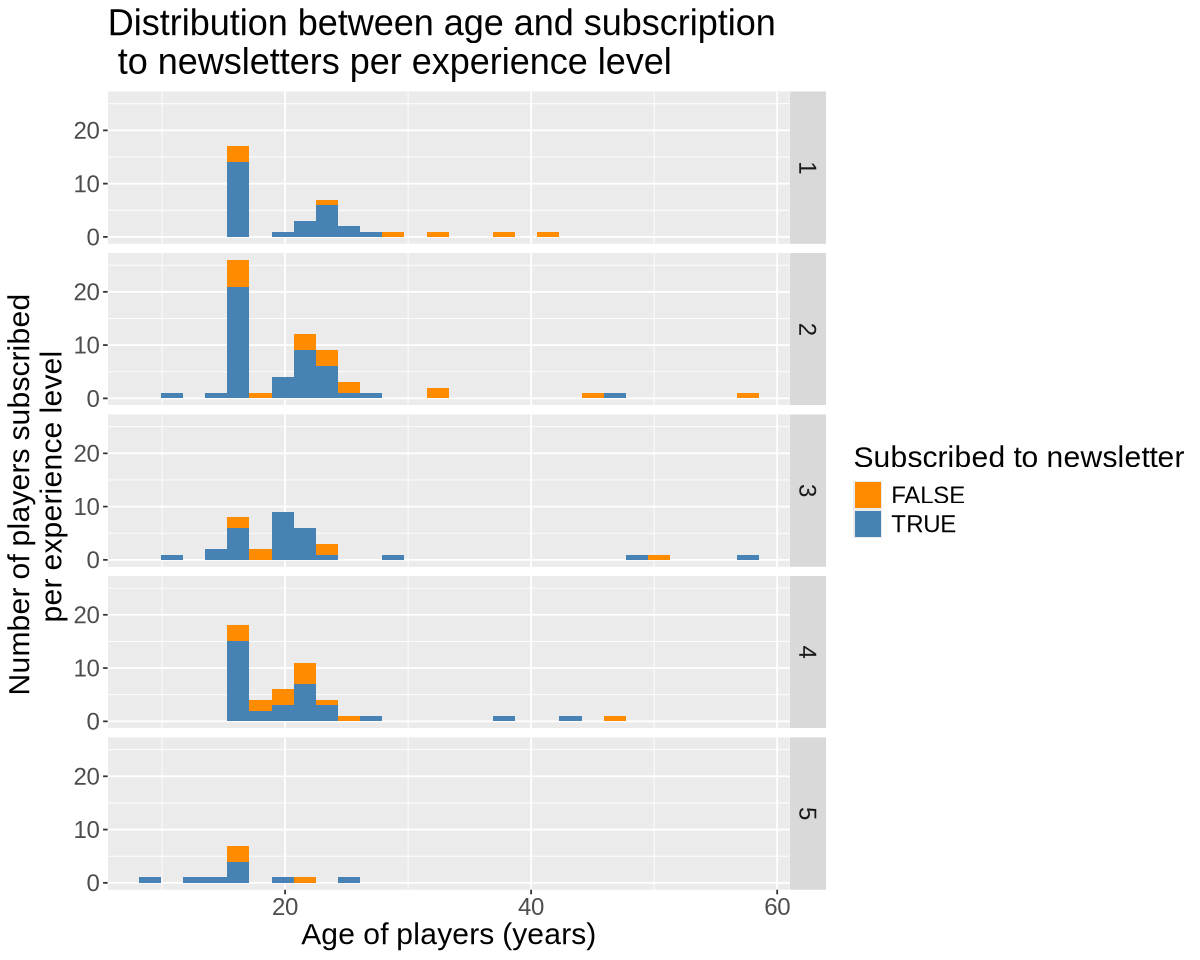

In [7]:
#Exploring the relationship between age and subscription to newsletters
options(repr.plot.width = 10, repr.plot.height = 8)
players_plot_age <- players_tidy_final |>
    ggplot(aes(x = age, fill = subscribed)) +
    geom_histogram(binwidth = 1.8) +
    facet_grid(rows = vars(experience_level)) +
    labs(x = "Age of players (years)",
         y = "Number of players subscribed \n per experience level",
         fill = "Subscribed to newsletter") +
    ggtitle("Distribution between age and subscription \n to newsletters per experience level") +
    theme(text = element_text(size = 18)) +
    scale_fill_manual(values = c("darkorange", "steelblue"))
players_plot_age

### **Visualizations Continued**

The following bar graph denotes the differences in ages of each experience level, which helps better understand the broad question regarding differences in prediction results between player types.

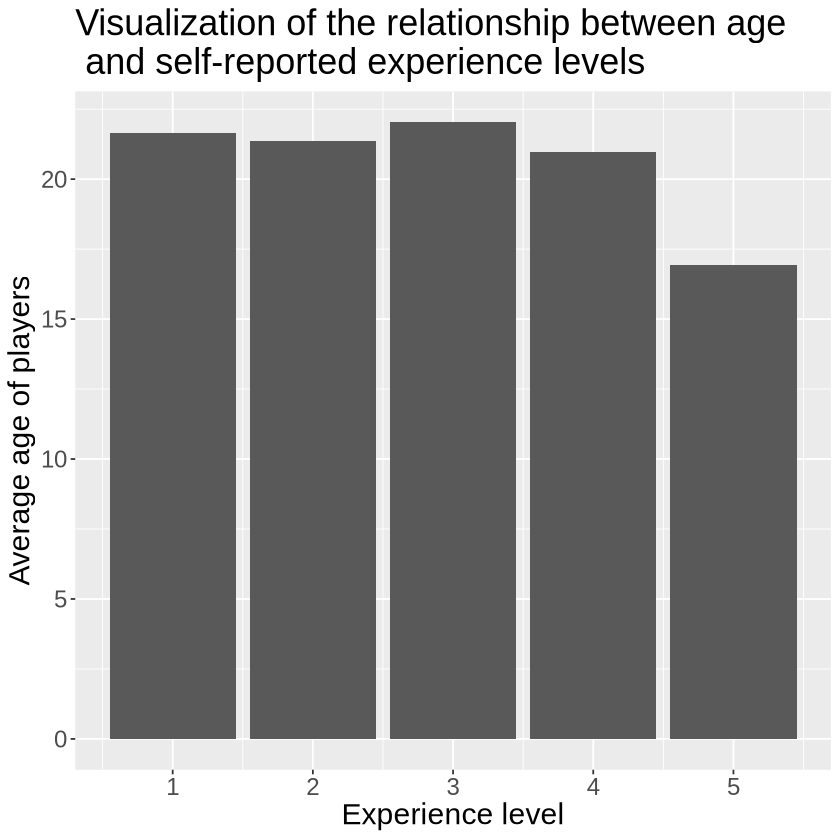

In [8]:
#Exploring the relationship between age and experience in Minecraft
options(repr.plot.width = 7, repr.plot.height = 7)
players_plot_mean_age <- players_mean |>
    ggplot(aes(x = experience_level, y = average_age)) +
    geom_bar(stat = "identity") +
    labs(x = "Experience level",
         y = "Average age of players") +
    ggtitle("Visualization of the relationship between age \n and self-reported experience levels") +
    theme(text = element_text(size = 18))
players_plot_mean_age

### **Methodolgy**

One method to answer my question is to group players based on experience level, then run a knn model, using the vfold function to determine the optimal number of neighbors. This model is appropriate as grouping based on experience level will best answer the broad question, while using knn model is best based on the non-linear relationship between age and subscription shown in the histogram visualization. This assumes that each experience level has enough players to run a knn model, which if false could lead to inaccurate predictions, which is a potential limitation. A linear model will also be tested and compared to using rmspe, in case it provides better results. A 0.75:0.25 split between training and testing sets seems optimal, which allows enough points to train the model while also validating results.